# Conversion Rate Project
The project is aimed at helping an organization increase the number of people that make purchases (convert) after visiting their website 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import pathlib as pt
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
%matplotlib inline

#set default for plotting images

plt.rcParams['figure.figsize'] = (10.0, 8.0)

### Import Data

In [2]:
df = pd.read_csv("conversion_data.csv")

### Preview Data

In [3]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
df.shape

(316200, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [6]:
pd.set_option('precision', 2)
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.00,316200.00,316200.00,316200.00
mean,30.57,0.69,4.87,0.03
std,8.27,0.46,3.34,0.18
min,17.00,0.00,1.00,0.00
25%,24.00,0.00,2.00,0.00
50%,30.00,1.00,4.00,0.00
75%,36.00,1.00,7.00,0.00
max,123.00,1.00,29.00,1.00


There is an outlier in the age (max = 123) so we are cleaning the data based on age. 

In [7]:
df.drop(df[df.age > 80].index, inplace = True)

### New preview

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316198 non-null  object
 1   age                  316198 non-null  int64 
 2   new_user             316198 non-null  int64 
 3   source               316198 non-null  object
 4   total_pages_visited  316198 non-null  int64 
 5   converted            316198 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.9+ MB


In [9]:
df
pd.set_option('precision', 2)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,316198.0,30.57,8.27,17.0,24.0,30.0,36.0,79.0
new_user,316198.0,0.69,0.46,0.0,0.0,1.0,1.0,1.0
total_pages_visited,316198.0,4.87,3.34,1.0,2.0,4.0,7.0,29.0
converted,316198.0,0.03,0.18,0.0,0.0,0.0,0.0,1.0


In [10]:
breakdown = df['converted'].value_counts()
breakdown

0    306000
1     10198
Name: converted, dtype: int64

So far, we note that 306,000 (96.77%) of total users do not purchase after visit.
10,198 users purchase from the company.

### Eploring the data with visuals

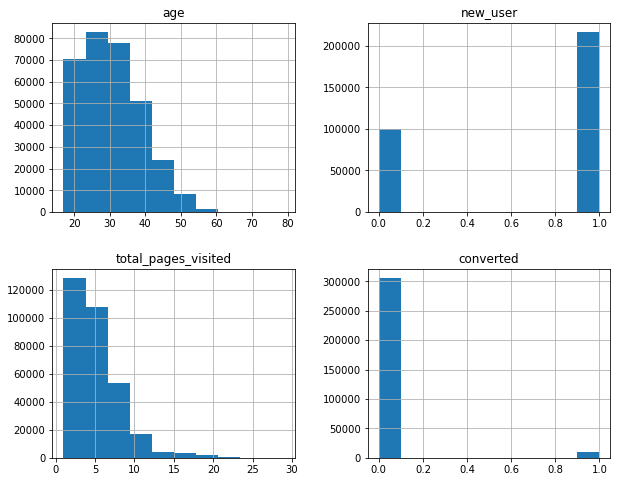

In [11]:
df.hist()
plt.show()

We see that a huge population of users are under 40 years old. Also, very few users view more than 5 pages

### Converted vs Pages Visited

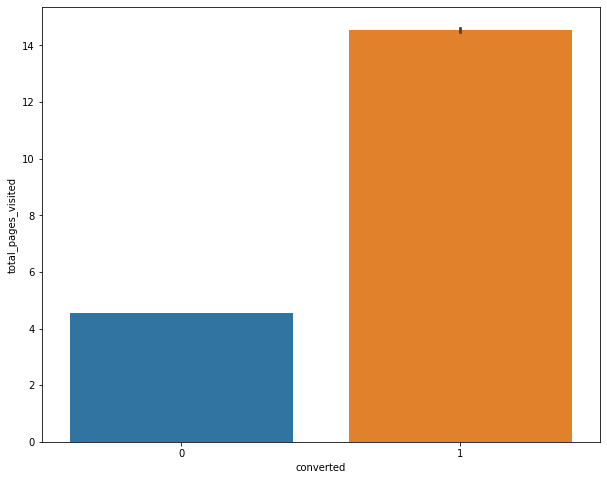

In [12]:
# bar plot

sns.barplot(x='converted', y='total_pages_visited', data=df)

plt.show()

Interestingly, most of the converted customers visited more than 5 pages.

### Converted and New User vs Pages Visited

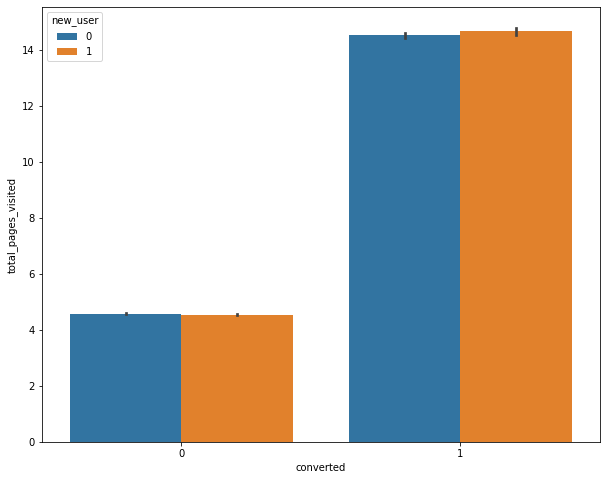

In [13]:
# bar plot

sns.barplot(x='converted', y='total_pages_visited',hue='new_user', data=df)

plt.show()

We also see that a huge population of new users convert

#### Evaluation of Data Based on Number of Users Per Country

US         178092
China       76602
UK          48449
Germany     13055
Name: country, dtype: int64


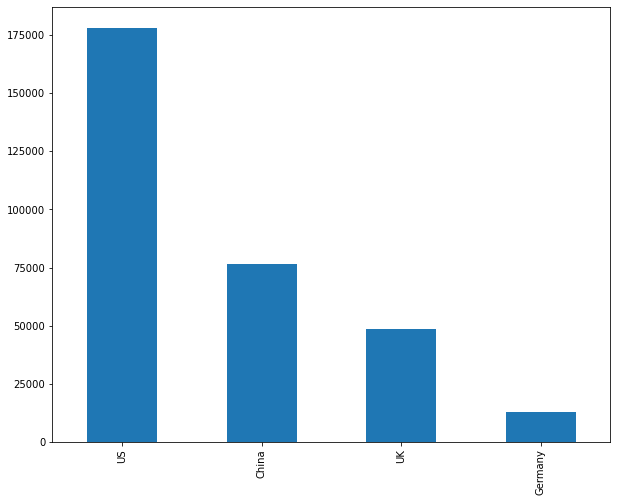

In [14]:
users_by_country = df['country'].value_counts()
print(users_by_country)
df['country'].value_counts().plot(kind = 'bar')
plt.show()

### Conversion Per Country

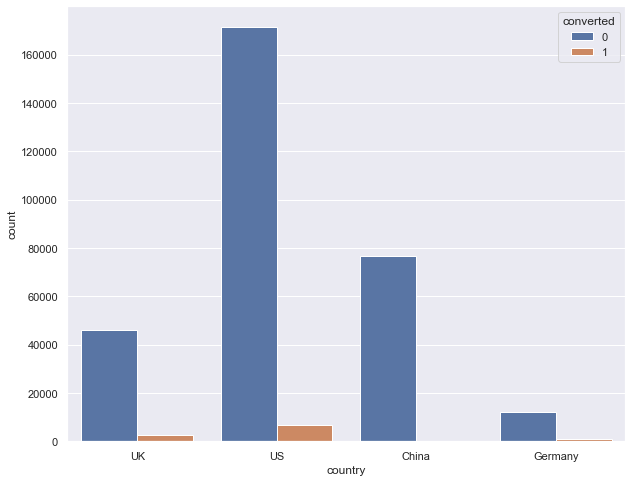

In [15]:

sns.set_theme(style="darkgrid")

sns.countplot(x="country", hue = "converted", data=df)
plt.show()

### Customer Distribution based on Sources

What is the conversion like from the users we get via these sources?

Seo       155039
Ads        88739
Direct     72420
Name: source, dtype: int64


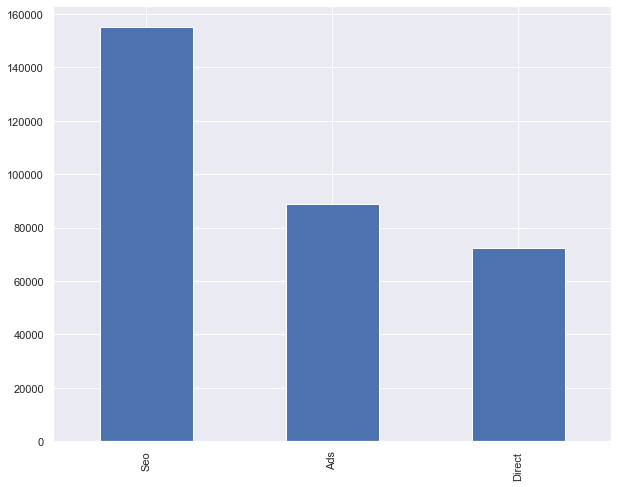

In [16]:
users_by_source = df['source'].value_counts()
print(users_by_source)
df['source'].value_counts().plot(kind = 'bar')
plt.show()

#### Conversion of Users  From Sources

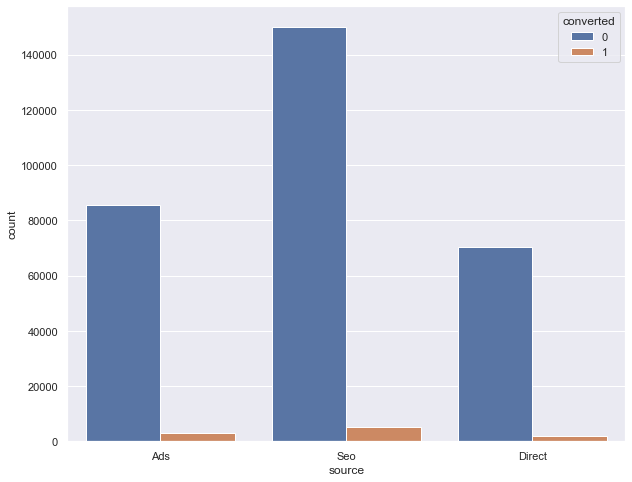

In [18]:

sns.set_theme(style="darkgrid")

sns.countplot(x="source", hue = "converted", data=df)

plt.show()

### Distribution by Country, Sources and Conversion

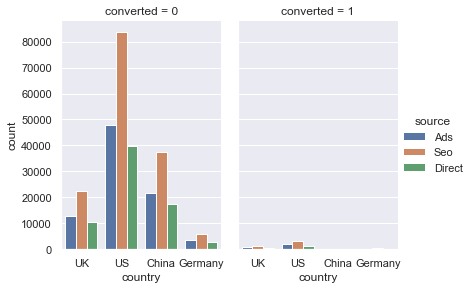

In [19]:
sns.catplot(x="country", hue="source", col="converted", data=df, kind="count", height=4, aspect=.7)

plt.show()

In [27]:
#graph = pd.DataFrame({'countr': users_by_country, 'from_source': users_by_source}, index = index)
#ax = df.plot.bar(rot=0)

### Relationship between features and conversion

In [29]:
df.corr()

,age,new_user,total_pages_visited,converted
age,1.00,0.01,-0.05,-0.09
new_user,0.01,1.00,-0.08,-0.15
total_pages_visited,-0.05,-0.08,1.00,0.53
converted,-0.09,-0.15,0.53,1.00


In [30]:
df.skew()

age                    0.51
new_user              -0.80
total_pages_visited    1.44
converted              5.30
dtype: float64

<AxesSubplot:>

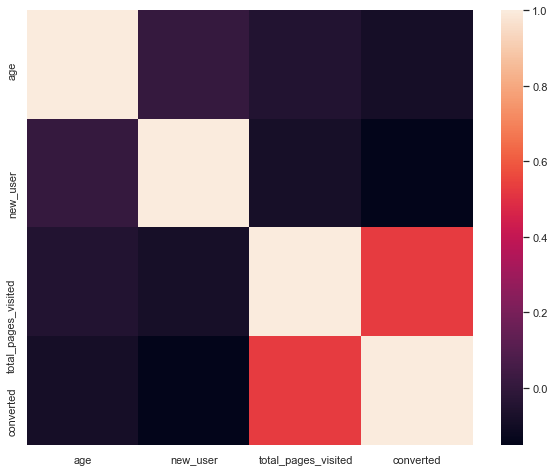

In [31]:
sns.heatmap(df.corr())

In [32]:
# Split the data
X = df.iloc[:,[2,4]].values
Y = df.iloc[:,5].values

From data exploration, it was noted that the most important features in the dataset were numeric, number of pages visited (translated to time spent on the website), age and whether the person is new user. Hence, other features were 

In [33]:
X_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

#### Standardize the data

In [34]:
standard_Scaler = StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)
X_test = standard_Scaler.transform(x_test)

#### Perform Logistic Regression

In [35]:
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [37]:
y_pred=log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

#### Confusion matrix to review performance of the model

In [39]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[61015,   258],
       [  714,  1253]])

In [40]:
# using sklearn metrics accuracy score
from sklearn.metrics import accuracy_score
accuracyscore = accuracy_score(y_test,y_pred)
accuracyscore

0.9846299810246679

The model is 98.46% accurate to predict if a user will convert or not based on data presented.

In [41]:
no_converted = breakdown[1]
no_converted

10198

In [42]:
total_pages = sum(df.iloc[:,4].values)
total_pages

1540807

In [43]:
conversion_rate = no_converted/total_pages
conversion_rate

0.0066186095987362465

The current conversion rate is 0.0066

In [44]:
X1 = df.iloc[:,[1,2,4]].values
Y1 = df.iloc[:,5].values

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
model = ExtraTreesClassifier()
model.fit(X1,Y1)

ExtraTreesClassifier()

In [47]:
print(model.feature_importances_)

[0.03479764 0.05101564 0.91418672]


#### Recommendations

The most important feature in whether or not a user will convert is the number of pages visited. The marketing team can look into how to keep users glued to the website such as a captivating landing page. 
Targeted adverts should be sent to existing users (that have not converted) on flash sales or just inviting them to check out new products. Things like 'treasure hunts' will also increase the number of users and the length of time spent, and consequently, the conversion rate.
From the exploration and model, the market in Germany is almost non-existent. Resources can be channeled into improving patronage from that region. Resources should also be channeled to other North American and Asian countries since the organization has a huge presence in major countries on these continents. 

Also, a large population of users are visiting via SEO. More resources can be directed towards more publicity via SEOs. 